<img style="float: align; margin: 0px 0px 15px 15px;" src="https://www.iteso.mx/documents/27014/202031/Logo-ITESO-MinimoV.png" width="150px" height="200px" />

# Proyecto de Aplicación Profesional. MODELO PARA PRONOSTICAR EL TIPO DE CAMBIO MEDIANTE LA CORRECION DE LA MONEDA CON UN INDICE.


## <font color="RED">**INTEGRANTE:**</font>

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.elcontribuyente.mx/wp-content/uploads/2019/06/Tipo-cambio-mercado-divisas-d%C3%B3lar-pesos-768x427.jpg" width="300px" height="200px" />

    Jesús Manuel Salomón Calderón.


## <font color="RED">**PROFESOR:**</font>
    Francisco Muñoz.

#  <span style="color:blue">1.1 Descripción del trabajo </span>

## <font color = "green" > **¿Qué es un tipo de cambio?**: 

    El tipo de cambio es una referencia que se usa en el mercado cambiario para conocer el número de unidades de moneda nacional que deben pagarse para obtener una moneda extranjera, o similarmente, el número de unidades de moneda nacional que se obtienen al vender una unidad de moneda extranjera.


## <font color = "green" > **¿Qué es Forex?**: 
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://elconferencista.net/wp-content/uploads/2017/02/forex.jpg" width="200px" height="130px" />
    
    También es conocido como mercado de divisas, es un mercado mundial descentralizado de todas las divisas que se operan en todo el mundo. Este mercado es el más grande y más líquido del mundo, con un volumen diario de operaciones que supera los 5 billones de dólares. Los demás mercados bursátiles en el mundo en conjunto no se acercan a esto. 

## <font color = "green" > **¿Cómo se pronostica el tipo de cambio?**:     
    
    Pronosticar el tipo de cambio es muy importante para personas físicas como para empresas. Existen personas que generan ganancias sobre la compra y venta de este. Para las empresas que importan o exportan algún bien o servicio es importante para saber cuánto tiene que pagar y cobrar en su negocio. Para esto se utilizan pronósticos para el tipo de cambio, existen dos métodos conocidos, el análisis fundamental y el análisis técnico. En el análisis fundamental existen dos métodos que son el método de la balanza de pagos y el método de mercado de activos.
    
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://cdn-3.expansion.mx/dims4/default/262ba47/2147483647/strip/true/crop/1346x779+0+0/resize/800x463!/quality/90/?url=https%3A%2F%2Fcherry-brightspot.s3.amazonaws.com%2Fea%2Fa3%2F7b3d5b574101abb484e551f0e01c%2Ftipo-de-cambio-pronostico-bola-cristral-is-vallariee.jpg" width="200px" height="130px" />

#  <span style="color:blue">**1.2 Objetivos**</span>

#### 1.2.1 Objetivo general.

* Analizar la correlación en una serie de tiempo que existe entre el IPC y el tipo de cambio entre dólar estadounidense y peso mexicano para poder predecir si el tipo de cambio va hacia la alza o a la baja.  
 

#### 1.2.2 Objetivo específico.
* Dividir el periodo de tiempo en series de tiempo semanales para obtener la correlación semanal y poder  ver como varia el comportamiento de hacia la alza y la baja.

* Bajo el modelo de correlación que utilizamos ver que oportunidades de traiding existen entre el IPC y el tipo de cambio.

* Comparar los resultados obtenido con los modelos de promedios móviles y tendencia para ver qué modelo es más eficaz y por qué.


#  <span style="color:blue">**1.3 Modelo matemático**</span>


### <span style="color:green">**Correlación **</span>

la correlación alude a la proporcionalidad y la relación lineal que existe entre distintas variables. Si los valores de una variable se modifican de manera sistemática con respecto a los valores de otra, se dice que ambas variables se encuentran correlacionadas.

Supongamos que tenemos una variable R y una variable S. Al aumentar los valores de R, aumentan los valores de S. De igual modo, al aumentar los valores de S, se incrementan los valores de R. Por lo tanto hay una correlación entre las variables R y S.es son colineales de dirección opuesto.

#  <span style="color:blue">**Obtener datos**</span>

Para realizar el proyector utilizaremos Oanda para sacar los datos históricos del tipo de cambio y Yahoo para el IPC.

In [2]:
# importando modulos necesarios
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
#from pydataset import data
import statsmodels.api as sm 
import pandas

# librerías de visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt 


# graficos incrustados
%matplotlib inline
import plotly.graph_objects as go
import plotly.io as pio                             # renderizador para visualizar imagenes
pio.renderers.default = "browser"   


# pandas solo 4 decimales
pd.set_option('precision', 4)
import math

from datetime import timedelta                            # para incrementos de fechas
from oandapyV20 import API                                # conexion con broker OANDA
import oandapyV20.endpoints.instruments as instruments    # informacion de precios historicos

Creamos una función para sacar los precios masivos del tipo de cambio donde se pueda sacar el precio de cierre a una hora determinada.

In [3]:
def f_precios_masivos(p0_fini, p1_ffin, p2_gran, p3_inst, p4_oatk, p5_ginc):
    """
    Parameters
    ----------
    p0_fini
    p1_ffin
    p2_gran
    p3_inst
    p4_oatk
    p5_ginc

    Returns
    -------
    dc_precios

    Debugging
    ---------

    """

    def f_datetime_range_fx(p0_start, p1_end, p2_inc, p3_delta):
        """

        Parameters
        ----------
        p0_start
        p1_end
        p2_inc
        p3_delta

        Returns
        -------
        ls_resultado

        Debugging
        ---------
        """

        ls_result = []
        nxt = p0_start

        while nxt <= p1_end:
            ls_result.append(nxt)
            if p3_delta == 'minutes':
                nxt += timedelta(minutes=p2_inc)
            elif p3_delta == 'hours':
                nxt += timedelta(hours=p2_inc)
            elif p3_delta == 'days':
                nxt += timedelta(days=p2_inc)

        return ls_result

    # inicializar api de OANDA

    api = API(access_token=p4_oatk)

    gn = {'S30': 30, 'S10': 10, 'S5': 5, 'M1': 60, 'M5': 60 * 5, 'M15': 60 * 15,
          'M30': 60 * 30, 'H1': 60 * 60, 'H4': 60 * 60 * 4, 'H8': 60 * 60 * 8,
          'D': 60 * 60 * 24, 'W': 60 * 60 * 24 * 7, 'M': 60 * 60 * 24 * 7 * 4}

    # -- para el caso donde con 1 peticion se cubran las 2 fechas
    if int((p1_ffin - p0_fini).total_seconds() / gn[p2_gran]) < 4999:

        # Fecha inicial y fecha final
        f1 = p0_fini.strftime('%Y-%m-%dT%H:%M:%S')
        f2 = p1_ffin.strftime('%Y-%m-%dT%H:%M:%S')

        # Parametros pra la peticion de precios
        params = {"granularity": p2_gran, "price": "M", "dailyAlignment": 16, "from": f1,
                  "to": f2}

        # Ejecutar la peticion de precios
        a1_req1 = instruments.InstrumentsCandles(instrument=p3_inst, params=params)
        a1_hist = api.request(a1_req1)

        # Para debuging
        # print(f1 + ' y ' + f2)
        lista = list()

        # Acomodar las llaves
        for i in range(len(a1_hist['candles']) - 1):
            lista.append({'TimeStamp': a1_hist['candles'][i]['time'],
                          'Open': a1_hist['candles'][i]['mid']['o'],
                          'High': a1_hist['candles'][i]['mid']['h'],
                          'Low': a1_hist['candles'][i]['mid']['l'],
                          'Close': a1_hist['candles'][i]['mid']['c']})

        # Acomodar en un data frame
        r_df_final = pd.DataFrame(lista)
        r_df_final = r_df_final[['TimeStamp', 'Open', 'High', 'Low', 'Close']]
        r_df_final['TimeStamp'] = pd.to_datetime(r_df_final['TimeStamp'])

        return r_df_final

    # -- para el caso donde se construyen fechas secuenciales
    else:

        # hacer series de fechas e iteraciones para pedir todos los precios
        fechas = f_datetime_range_fx(p0_start=p0_fini, p1_end=p1_ffin, p2_inc=p5_ginc,
                                     p3_delta='minutes')

        # Lista para ir guardando los data frames
        lista_df = list()

        for n_fecha in range(0, len(fechas) - 1):

            # Fecha inicial y fecha final
            f1 = fechas[n_fecha].strftime('%Y-%m-%dT%H:%M:%S')
            f2 = fechas[n_fecha + 1].strftime('%Y-%m-%dT%H:%M:%S')

            # Parametros pra la peticion de precios
            params = {"granularity": p2_gran, "price": "M", "dailyAlignment": 16, "from": f1,
                      "to": f2}

            # Ejecutar la peticion de precios
            a1_req1 = instruments.InstrumentsCandles(instrument=p3_inst, params=params)
            a1_hist = api.request(a1_req1)

            # Para debuging
            print(f1 + ' y ' + f2)
            lista = list()

            # Acomodar las llaves
            for i in range(len(a1_hist['candles']) - 1):
                lista.append({'TimeStamp': a1_hist['candles'][i]['time'],
                              'Open': a1_hist['candles'][i]['mid']['o'],
                              'High': a1_hist['candles'][i]['mid']['h'],
                              'Low': a1_hist['candles'][i]['mid']['l'],
                              'Close': a1_hist['candles'][i]['mid']['c']})

            # Acomodar en un data frame
            pd_hist = pd.DataFrame(lista)
            pd_hist = pd_hist[['TimeStamp', 'Open', 'High', 'Low', 'Close']]
            pd_hist['TimeStamp'] = pd.to_datetime(pd_hist['TimeStamp'])

            # Ir guardando resultados en una lista
            lista_df.append(pd_hist)

        # Concatenar todas las listas
        r_df_final = pd.concat([lista_df[i] for i in range(0, len(lista_df))])

        # resetear index en dataframe resultante porque guarda los indices del dataframe pasado
        r_df_final = r_df_final.reset_index(drop=True)

        return r_df_final

Damos los parámetros del tipo de cambio diario y con hora de cierre a las 4pm (hora de la Ciudad de México) porque es la hora en la que cierra la bolsa mexicana de valores.

In [5]:
OA_Ak = 'c' + 'a81fea8e4689da24e8b8321bc17865c-74dcb8a83c923513f674956e910a99b' +'c'
#from datos import OA_Ak           
#import funciones as fn

OA_Gn = "D";                     # Granularidad de velas
OA_In = "USD_MXN";
fi = "2019-01-03 16:00:00" ;     #Fecha inicial 
ff   =  "2019-12-30 16:00:00";    #Fecha Fianl 
fini = (pd.to_datetime(fi).tz_localize('GMT')) - timedelta(hours=6); # Fecha inicial
ffin = (pd.to_datetime(ff).tz_localize('GMT')) - timedelta(hours=6);  # Fecha
#data = fn.f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)  
dolar = f_precios_masivos(p0_fini=fini, p1_ffin=ffin, p2_gran=OA_Gn,p3_inst=OA_In, p4_oatk=OA_Ak, p5_ginc=4900)  
dolar

,TimeStamp,Open,High,Low,Close
0,2019-01-02 21:00:00+00:00,19.54222,19.67294,19.53274,19.61683
1,2019-01-03 21:00:00+00:00,19.61683,19.67196,19.37229,19.41802
2,2019-01-04 21:00:00+00:00,19.41797,19.43522,19.41419,19.41949
3,2019-01-06 21:00:00+00:00,19.42026,19.47598,19.29360,19.36470
4,2019-01-07 21:00:00+00:00,19.36470,19.43734,19.28222,19.37658
...,...,...,...,...,...
304,2019-12-23 21:00:00+00:00,18.95446,18.98820,18.92516,18.98230
305,2019-12-24 21:00:00+00:00,18.98220,18.98235,18.97354,18.97384
306,2019-12-25 21:00:00+00:00,18.97095,18.97890,18.93164,18.93997
307,2019-12-26 21:00:00+00:00,18.93988,18.95692,18.80714,18.86414


Como podemos notar tenemos una tabla ya con los precios pero nos interesa separarlos por semana, por lo tanto agregaremos una columna que nos identifique en que semana estamos.

In [6]:
a=0
b=dolar.index.stop
semana=[]
for a in range(b):
    semana.append(dolar['TimeStamp'][a].week)
    a=a+1
dolar['semana']=pd.Series(semana,  index=dolar.index)
dolar

,TimeStamp,Open,High,Low,Close,semana
0,2019-01-02 21:00:00+00:00,19.54222,19.67294,19.53274,19.61683,1
1,2019-01-03 21:00:00+00:00,19.61683,19.67196,19.37229,19.41802,1
2,2019-01-04 21:00:00+00:00,19.41797,19.43522,19.41419,19.41949,1
3,2019-01-06 21:00:00+00:00,19.42026,19.47598,19.29360,19.36470,1
4,2019-01-07 21:00:00+00:00,19.36470,19.43734,19.28222,19.37658,2
...,...,...,...,...,...,...
304,2019-12-23 21:00:00+00:00,18.95446,18.98820,18.92516,18.98230,52
305,2019-12-24 21:00:00+00:00,18.98220,18.98235,18.97354,18.97384,52
306,2019-12-25 21:00:00+00:00,18.97095,18.97890,18.93164,18.93997,52
307,2019-12-26 21:00:00+00:00,18.93988,18.95692,18.80714,18.86414,52


Como el tipo de cambio nunca cierra nos agrega los domingos, por lo tanto tenemos que quitarlos. Lo que hicimos fue identificar el primer domingo y hacer un ciclo que cada 6 días nos de el valor del domingo para poder quitarlo de DataFrame. Como en México existen días festivos que en otros países no, también los tenemos que quitar pero en este caso son de forma manual porque cada año las fechas cambian.

In [7]:
sunday=list(range(3, len(dolar), 6))
usd2=dolar.drop(sunday,axis=0)
usd=usd2.drop([28,64,91,92,102,220,274,295,306],axis=0)
#27,63,219,237
usd

,TimeStamp,Open,High,Low,Close,semana
0,2019-01-02 21:00:00+00:00,19.54222,19.67294,19.53274,19.61683,1
1,2019-01-03 21:00:00+00:00,19.61683,19.67196,19.37229,19.41802,1
2,2019-01-04 21:00:00+00:00,19.41797,19.43522,19.41419,19.41949,1
4,2019-01-07 21:00:00+00:00,19.36470,19.43734,19.28222,19.37658,2
5,2019-01-08 21:00:00+00:00,19.37653,19.38240,19.20244,19.23003,2
...,...,...,...,...,...,...
302,2019-12-20 21:00:00+00:00,18.92972,18.94200,18.91860,18.93739,51
304,2019-12-23 21:00:00+00:00,18.95446,18.98820,18.92516,18.98230,52
305,2019-12-24 21:00:00+00:00,18.98220,18.98235,18.97354,18.97384,52
307,2019-12-26 21:00:00+00:00,18.93988,18.95692,18.80714,18.86414,52


Realizaremos lo mismo pasos pero esta vez con el ipc.

In [8]:
ipc = web.DataReader("^MXX", 'yahoo', '2019-1-2', '2019-12-28')

In [9]:
ipc['semana'] = ipc.index.week
ipc

,High,Low,Open,Close,Volume,Adj Close,semana
Date,,,,,,,
2019-01-02,42328.5508,41436.4883,41550.7500,42271.1406,68115200,42271.1406,1
2019-01-03,42292.3906,41699.7812,42172.2617,42044.3203,113098700,42044.3203,1
2019-01-04,42661.8398,42024.7695,42024.7695,42455.1289,110987200,42455.1289,1
2019-01-07,42896.1094,42313.0586,42489.0508,42834.1992,142739600,42834.1992,2
2019-01-08,43582.1914,43024.5195,43264.1914,43542.8711,174362500,43542.8711,2
...,...,...,...,...,...,...,...
2019-12-20,44804.4414,44424.4609,44694.4492,44505.6406,473714200,44505.6406,51
2019-12-23,44590.9297,44189.2383,44571.2617,44276.8516,92129000,44276.8516,52
2019-12-24,44298.9414,44108.4492,44275.7891,44157.9688,13691800,44157.9688,52


Comprobamos que tenemos el mismo número de datos para el tipo de cambio y el IPC.

In [10]:
len(usd),len (ipc)

(249, 249)

Creamos dos ciclos, el primero es para saber cuántas semanas tenemos en el DataFrame y el segundo es para sacar la correlación con otro ciclo dentro porque los precios de cierre del tipo de cambio no los detecta como numero sino como cadena de texto y lo tenemos que convertir.

In [11]:
semanas=[]
for x in ipc['semana']:
    if x not in semanas:
        semanas.append(x)
correlacion=[]
for x in semanas:
    correlacion.append(np.corrcoef(list(ipc[ipc['semana'] == x]['Adj Close']),[float(x) for x in list(usd[usd['semana'] == x]['Close'])])[0,1])

Creamos un DataFrame con los datos de la correlación.

In [12]:
weeks=list(range(1, len(correlacion)+1, 1))
dt = pd.DataFrame(columns=('Semana', 'Correlación'))
dt['Correlación']=correlacion
dt['Semana']= weeks
dt

,Semana,Correlación
0,1,0.0665
1,2,-0.9493
2,3,0.6834
3,4,0.9788
4,5,0.2757
5,6,-0.7144
6,7,0.3272
7,8,-0.4238
8,9,-0.8155
9,10,-0.7866


Como podemos ver en la tabla  la mayoría de resultados son negativos. Por lo tanto queremos ver cómo se comportan con la gráfica. En el primer mes solo hay un resultado negativo que ese no nos ayuda tanto, lo que podemos notar es a partir del mes de febrero donde todos los valores ya empiezan a poner se en negativos que es cuando las gráficas se abren, a finales de mes hay resultados positivos que son donde las gráficas se juntan. En marzo las gráficas llegan hasta un -0.9411 el cual es un valor muy cercano al -1 lo cual nos quiere decir que si lleva una correlación negativa. Otro cambio muy notorio es a mediados de año donde las gráficas pasan a la inversa, la que estaba arriba se va abajo y la que estaba abajo se va arriba. Nuestro modelo nos dice que se juegan con las correlaciones, que empiezan en negativas, luego positivas y luego otra vez positivas, es lo que genera este efecto. 

Para entender un poco más este modelo lo relacionamos con la economía, ¿Por qué el índice de la bolsa mexicana de valores le lleva la contra al tipo de cambio peso/dólar?. Bueno entrándonos un poco más en lo que es el IPC, este se calcula con la variación de precios de las acciones que cotizan en la bolsa, es decir, que puede ser como un promedio de la bolsa. Por otro lado el dólar es un tipo de cambio en cual se llevan todos lo comercio internacionales. Sin más vueltas a la pregunta la respuesta es que el tipo de cambio al tener tanta influencia en el mercado, si este sube, suben todos los precio y si este baja, bajan todos los precios. Cuando el tipo de cambio esta alto los precios suben por lo tanto las personas no compran tanto, y por consecuencia afectan a las empresas y llegan afectar a las que cotizan en bolsa, al aféctale a estas, entonces su valor baja y el índice baja. Entonces tenemos un tipo de cambio elevado y un índice bajo.


Ya entendiendo el modelo quisimos compararlo con otros, uno de ellos es una tendencia dada por el filtro de Hodrick-Prescott es cual es un método para extraer el componente secular o tendencia de una serie temporal, este utiliza Las fluctuaciones cíclicas las cuales son movimientos oscilatorios alrededor de una tendencia. Este filtro descompone la serie observada en dos componentes, uno tendencial y otro cíclico. Se visualiza como en la siguiente gráfica:

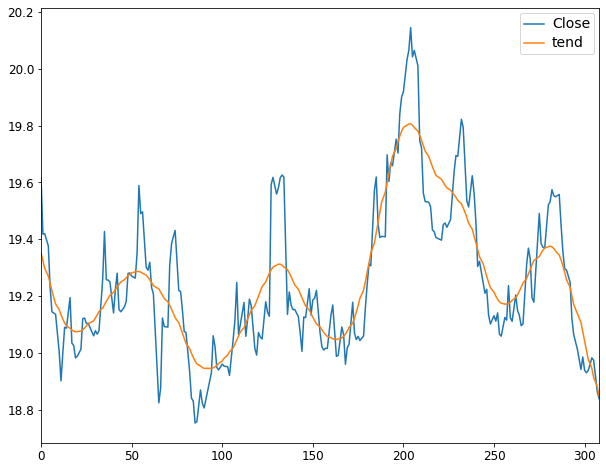

In [13]:
# Aplicando el filtro Hodrick-Prescott para separar en tendencia y 
# componente ciclico.
usd.TimeStamp=pd.to_numeric(usd.TimeStamp)
usd.Close=pd.to_numeric(usd.Close)

#data.plot.scatter(x='TimeStamp',y='Close')

usd_ciclo, usd_tend = sm.tsa.filters.hpfilter(usd['Close'])
usd['tend'] = usd_tend
usd[['Close', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

Es un método muy curioso y muy interesante pero la desventaja es que no se puede predecir mucho hacia dónde va la tendencia. Por lo que pensamos que sería muy bueno agregarle un modelo Monte Carlo para generar diversos escenarios para ver cuál escogeríamos para tomar la tendencia. 

También utilizamos el modelo de promedios móviles los cuales son un cálculo utilizado para analizar un conjunto de datos en modo de puntos para crear series de promedios. Pero el problema es que son un poco de complicados de utilizar y no siempre se juntan las gráficas. Pero nosotros notamos una buena opción de trading utilizar nuestro modelo junto con este para que creen buena mancuerna. En la siguiente grafica se ven los promedios móviles:

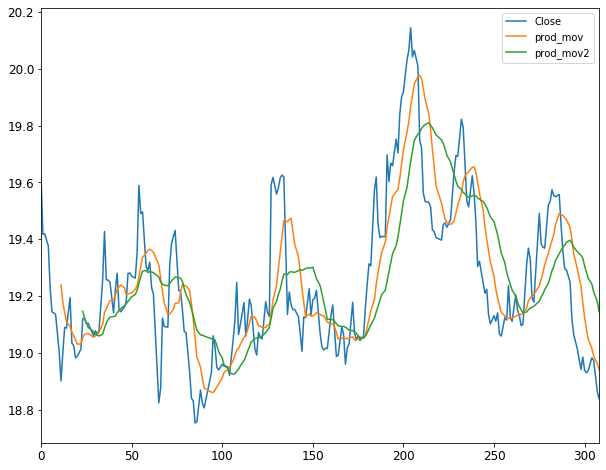

In [15]:
# Calculando promedios móviles cada 2 y 5 días
usd_ma = usd["Close"].rolling(10).mean()
usd['prod_mov'] = usd_ma
usd_ma2 = usd["Close"].rolling(20).mean()
usd['prod_mov2'] = usd_ma2
plot =usd[['Close', 'prod_mov','prod_mov2']].plot(figsize=(10, 8), fontsize=12)

Los promedios móviles son un cálculo utilizado para analizar un conjunto de datos en modo de puntos para crear series de promedios. Pero tampoco es muy efectivo y utilizando en conjunto con nuestro modelo pudiera funcionar bien.